# title

## stuff

In [1]:
library(tidyverse)
#source('./bayesian_blocksR/R/bb_func.R')
source('./func_bb.R')
library(microbenchmark)
library(latex2exp)
library(gridExtra)

set.seed(9725)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




In [39]:
test_func <- function(N) {
    dt = 0.05
    t = dt * seq(0, N-1)
    x = rep(0, N)
    x[sample(1:length(t), length(t) %/% 10)] <- 1
    # Some computation
    bayesian_blocks(t, x, dt=dt, data_type='RegularEvents')
}

# Initialize a list to store results
results <- list()

x_seq = seq(1000, 10000, by = 1000)
# Loop over increasing values of N
for (N in x_seq) {
  # Measure the time taken for each N
  result <- microbenchmark(test_func(N), times = 5)
  
  # Store the results
  results[[as.character(N)]] <- result
}

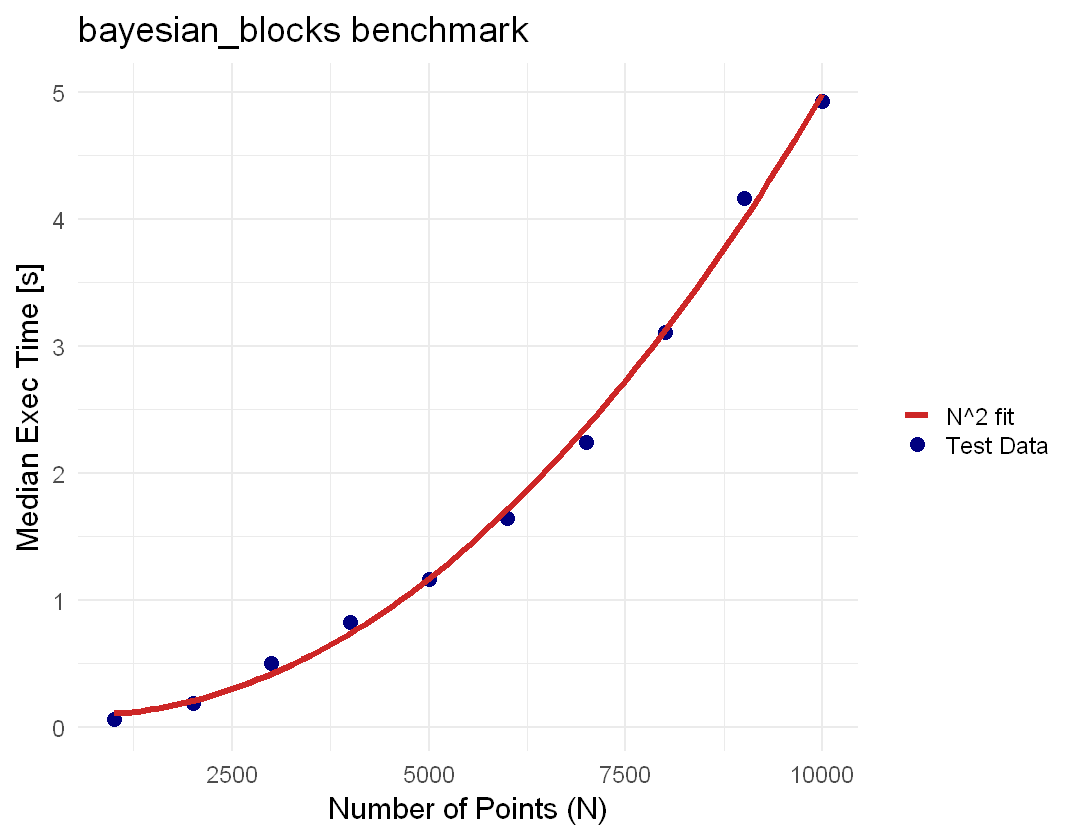

In [40]:
# Extract and plot the median times
median_times <- sapply(results, function(x) median(x$time) / 1e9)  # Convert from nanoseconds to seconds
res_df <- data.frame(x=x_seq, y=median_times)

options(repr.plot.width = 9, repr.plot.height = 7) 
bench_plot <- ggplot(res_df, aes(x=x, y=y)) + 
                       geom_point(aes(color='Test Data'), size=4) +
                       stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, aes(color = 'N^2 fit'), linewidth=1.7) + 
                       labs(x = 'Number of Points (N)', y = 'Median Exec Time [s]', title = 'bayesian_blocks benchmark', color='') +
                       scale_color_manual(values = c('Test Data' = 'navy', 'N^2 fit' = 'firebrick3')) +
                       theme_minimal(base_size = 18)
bench_plot

#plot(seq(1000, 10000, by = 1000), median_times, type = "b",
#     xlab = "Number of Points (N)", ylab = "Median Execution Time (seconds)")

In [2]:
norm_data <- c(rnorm(5000,-3,0.7),rnorm(3000,0,0.3),rnorm(5000,2.5,1))
N <- length(norm_data)

cat(sqrt(N))

114.0175

In [3]:
# gamma prior

breaks_gamma <- bayesian_blocks(norm_data, gamma=0.01)

# p0 prior

breaks_p0 <- bayesian_blocks(norm_data, p0=0.1)

cat('N° of gamma breaks = ', length(breaks_gamma), "\n")
cat('N° of p0 breaks = ', length(breaks_p0))

N° of gamma breaks =  37 
N° of p0 breaks =  29

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_bar()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_bar()`)."


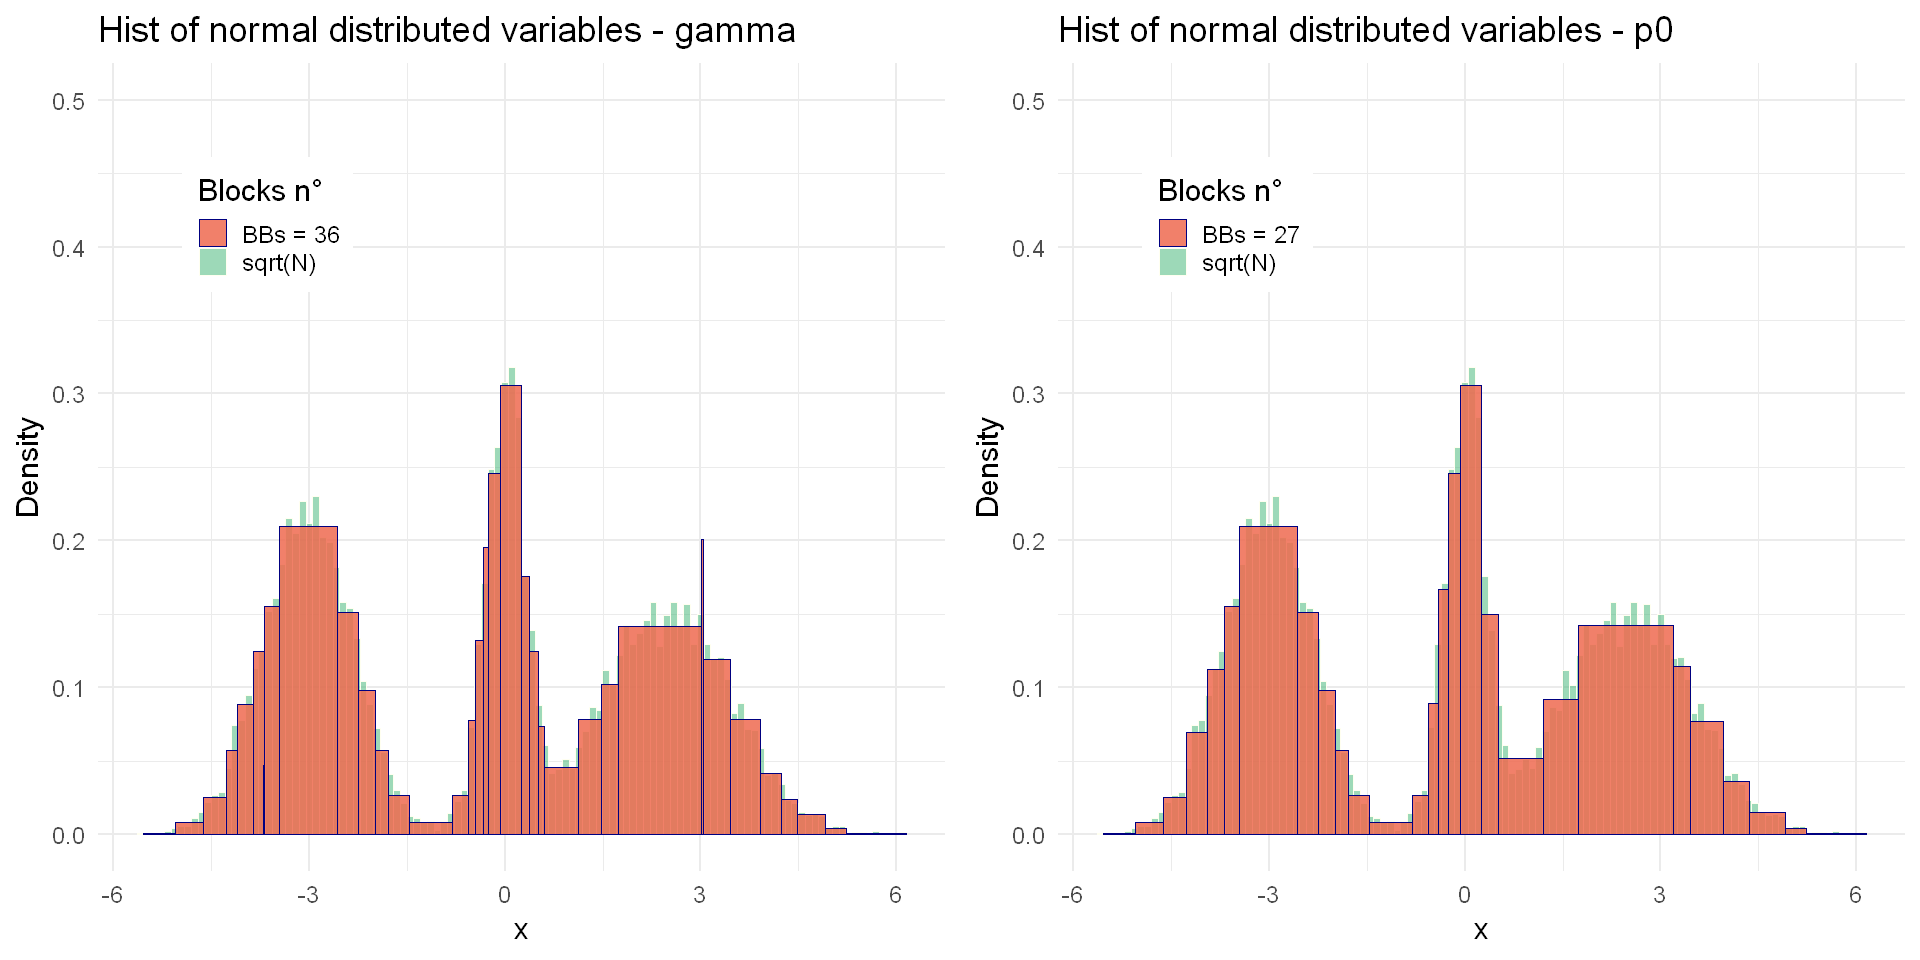

In [18]:
options(repr.plot.width=16, repr.plot.height=8)

layout <- matrix(c(1,2), ncol=2, byrow=T)

hist_gamma <- ggplot() + 
    geom_histogram(aes(x=norm_data, y=after_stat(density), fill = 'sqrt(N)'), bins = floor(sqrt(N)), alpha = 0.5, color = 'ivory') +
    geom_histogram(aes(x=norm_data, y=after_stat(density), fill = 'BBs = 36'), breaks = breaks_gamma, alpha=0.85, color = 'navy') + 
    theme_minimal(base_size = 18) + 
    theme(legend.position = c(0.2, 0.8), legend.background = element_rect(fill = "white", color='white')) +
    scale_fill_manual(values = c('sqrt(N)' = 'mediumseagreen', 'BBs = 36' = 'coral2')) + 
    labs(x='x', y='Density', title='Hist of normal distributed variables - gamma', fill='Blocks n°') +
    ylim(c(0,.5))

hist_p0 <- ggplot() + 
    geom_histogram(aes(x=norm_data, y=after_stat(density), fill = 'sqrt(N)'), bins = floor(sqrt(N)), alpha = 0.5, color = 'ivory') +
    geom_histogram(aes(x=norm_data, y=after_stat(density), fill = 'BBs = 27'), breaks = breaks_p0, alpha=0.85, color = 'navy') + 
    theme_minimal(base_size = 18) + 
    theme(legend.position = c(0.2, 0.8), legend.background = element_rect(fill = "white", color='white')) +
    scale_fill_manual(values = c('sqrt(N)' = 'mediumseagreen', 'BBs = 27' = 'coral2')) + 
    labs(x='x', y='Density', title='Hist of normal distributed variables - p0', fill='Blocks n°') + 
    ylim(c(0,.5))

grid.arrange(hist_gamma, hist_p0, layout_matrix = layout)

In [19]:
noise <- runif(1e4,0,8)
signal_1 <- rnorm(1e3,3,0.9)
signal_2 <- rnorm(1e3,7,0.3)
signal_3 <- rnorm(1e3,5,0.07)

tot_sig <- c(noise, signal_1, signal_2, signal_3)

N <- length(tot_sig)

cat(sqrt(N))

114.0175

In [22]:
breaks_noise_gamma <- bayesian_blocks(tot_sig, gamma=0.001)

cat('N° of gamma breaks =', length(breaks_noise_gamma), '\n')

breaks_noise_p0 <- bayesian_blocks(tot_sig, p0=0.05)

cat('N° of p0 breaks =', length(breaks_noise_p0), '\n')

N° of gamma breaks = 12 
N° of p0 breaks = 12 


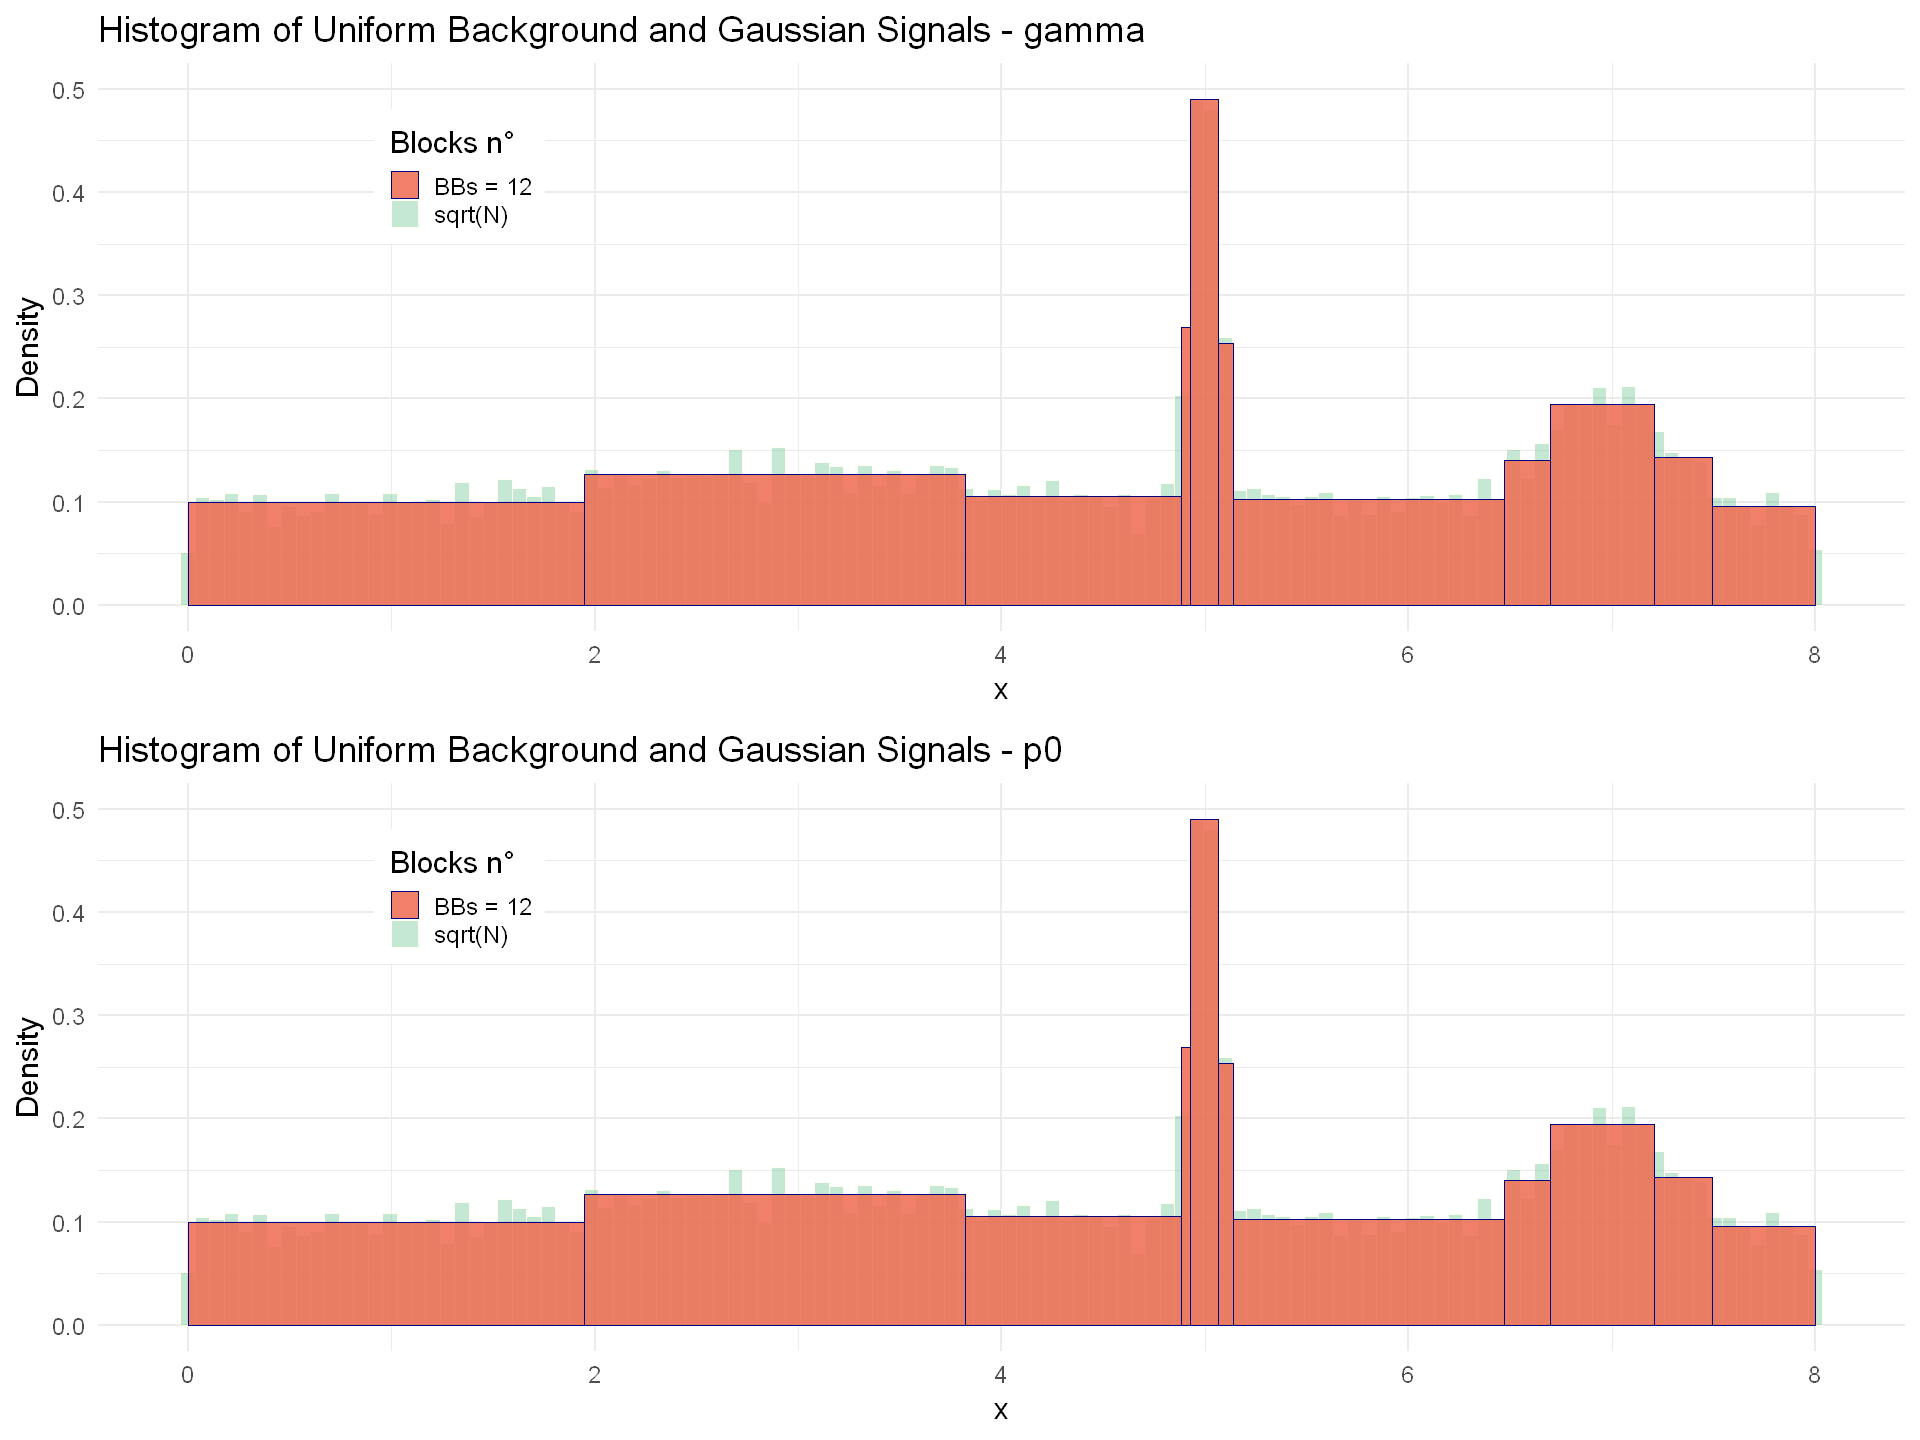

In [35]:
options(repr.plot.width=16, repr.plot.height=12)

layout <- matrix(c(1,2,1,2), ncol=2, byrow=F)

hist_noise_gamma <- ggplot() + 
    geom_histogram(aes(x=tot_sig, y=after_stat(density), fill = 'sqrt(N)'), bins = floor(sqrt(N)), alpha = 0.3, color = 'ivory') +
    geom_histogram(aes(x=tot_sig, y=after_stat(density), fill = 'BBs = 12'), breaks = breaks_noise_gamma, alpha=0.85, color = 'navy') + 
    theme_minimal(base_size = 18) + 
    theme(legend.position = c(0.2, 0.8), legend.background = element_rect(fill = "white", color='white')) +
    scale_fill_manual(values = c('sqrt(N)' = 'mediumseagreen', 'BBs = 12' = 'coral2')) + 
    labs(x='x', y='Density', title='Histogram of Uniform Background and Gaussian Signals - gamma', fill='Blocks n°') +
    ylim(c(0,.5))

hist_noise_p0 <- ggplot() + 
    geom_histogram(aes(x=tot_sig, y=after_stat(density), fill = 'sqrt(N)'), bins = floor(sqrt(N)), alpha = 0.3, color = 'ivory') +
    geom_histogram(aes(x=tot_sig, y=after_stat(density), fill = 'BBs = 12'), breaks = breaks_noise_p0, alpha=0.85, color = 'navy') + 
    theme_minimal(base_size = 18) + 
    theme(legend.position = c(0.2, 0.8), legend.background = element_rect(fill = "white", color='white')) +
    scale_fill_manual(values = c('sqrt(N)' = 'mediumseagreen', 'BBs = 12' = 'coral2')) + 
    labs(x='x', y='Density', title='Histogram of Uniform Background and Gaussian Signals - p0', fill='Blocks n°') + 
    ylim(c(0,.5))

grid.arrange(hist_noise_gamma, hist_noise_p0, layout_matrix = layout)